In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from collections import Counter
from collections import defaultdict

In [107]:
dataset=pd.read_csv('nuovo_dataset_totale.csv')

In [108]:
dataset.columns

Index(['id', 'name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'n_bars', 'genre', 'popularity_artist'],
      dtype='object')

In [109]:
dataset

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,[51.0]
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,[47.0]
2,56tXgHlSHCfgmGhwVXNizc,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,[44.0]
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,"[36.0, 40.0]"
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,[45.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,0wiDjWz3U1WfwXSrWHXe2b,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],...,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,"[86.0, 79.0, 50.0]"
109145,46n9OJc7LOIVdj8t2l5WA5,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,...,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,[47.0]
109146,127uq83uGFapbddqiMUKky,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,...,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,"[86.0, 79.0]"
109147,0ZdUHFxifUJNqo7G4aJzoF,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,...,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,"[47.0, 38.0]"


In [110]:
len(dataset)

109149

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
dataset=dataset.drop(['id'], axis=1)

In [114]:
dataset

,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,2017-09-22,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,[51.0]
1,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,2014-10-27,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,[47.0]
2,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,2018-06-22,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,[44.0]
3,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,"[36.0, 40.0]"
4,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,[45.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],2022-10-21,...,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,"[86.0, 79.0, 50.0]"
109145,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,2018-11-16,...,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,[47.0]
109146,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,2010-11-22,...,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,"[86.0, 79.0]"
109147,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,2015-11-25,...,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,"[47.0, 38.0]"


In [115]:
dataset.columns

Index(['name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'n_bars', 'genre', 'popularity_artist'],
      dtype='object')

In [116]:
# Funzione per trasformare le stringhe in liste di float
def trasforma_in_lista(lst_str):
    # Rimuovi i caratteri '[' e ']' e splitta la stringa
    lst_str = lst_str.strip('][').split(', ')
    # Utilizza eval per valutare la lista di stringhe e convertirla in una lista di float
    return [float(x) for x in lst_str]

# Applica la funzione a ciascun valore nella colonna
dataset['popularity_artist'] = dataset['popularity_artist'].apply(trasforma_in_lista)

# Calcola la media di ciascuna lista
dataset['popularity_artist'] = round(dataset['popularity_artist'].apply(np.mean),2)


In [117]:


# Define a function to assign class labels
def assign_class(genre):
    if genre in ['Hip hop', 'house', 'Black metal', 'techno', 'electronic', 
                 'Hard rock', 'heavy-metal', 'metal', 'rock', 'reggaeton']:
        return 1  # Agitato
    elif genre in ['ambient', 'sleep', 'study', 'sad', 'romance', 'chill', 
                   'classical', 'piano', 'opera', 'acoustic']:
        return 0  # Lento
    else:
        return None  # Unknown or other genre

# Add a new column "class" to the original DataFrame
dataset['class'] = dataset['genre'].apply(assign_class)

# Drop rows with unknown or other genres
dataset.dropna(subset=['class'], inplace=True)

# Convert the "class" column to integer type
dataset['class'] = dataset['class'].astype(int)

y=dataset["class"]

# Funzione per trasformare le stringhe in liste di float
def trasforma_in_lista(lst_str):
    # Rimuovi i caratteri '[' e ']' e splitta la stringa
    lst_str = lst_str.strip('][').split(', ')
    # Utilizza eval per valutare la lista di stringhe e convertirla in una lista di float
    return [float(x) for x in lst_str]


X=dataset.drop(['class', 'name', 'explicit', 'artists', 'disc_number','album_type', 'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'album_name', 'mode_confidence', 'genre'], axis=1)

In [118]:
dataset


,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,...,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist,class
2016,Closer,1.0,244.96,False,86.0,1.0,The Chainsmokers;Halsey,single,Closer,2016-07-29,...,95.01,4.0,0.31,1.00,0.64,0.62,94.0,house,79.0,1
2017,Goosebumps - Remix,1.0,162.80,True,81.0,1.0,Travis Scott;HVME,single,Goosebumps (Remix),2021-01-15,...,124.92,4.0,0.78,1.00,0.30,0.54,83.0,house,78.0,1
2018,One Kiss (with Dua Lipa),1.0,214.85,False,88.0,1.0,Calvin Harris;Dua Lipa,single,One Kiss (with Dua Lipa),2018-04-06,...,123.99,4.0,0.93,1.00,0.63,0.62,108.0,house,85.0,1
2019,On My Way,1.0,193.80,True,75.0,1.0,Alan Walker;Sabrina Carpenter;Farruko,single,On My Way,2019-03-21,...,170.09,4.0,0.04,1.00,0.36,0.63,136.0,house,79.0,1
2020,Happier,1.0,214.29,False,85.0,1.0,Marshmello;Bastille,single,Happier,2018-08-17,...,100.02,4.0,0.31,0.99,0.56,0.59,88.0,house,76.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99492,Draw A Crowd,1.0,254.35,False,30.0,6.0,Ben Folds Five,album,The Sound Of The Life Of The Mind,2012-09-18,...,112.21,4.0,0.84,1.00,0.43,0.57,117.0,piano,43.0,0
99493,Father in Heaven,2.0,147.63,False,29.0,8.0,Paul Cardall,album,40 Hymns for Forty Days,2015-04-14,...,76.49,4.0,0.28,0.11,0.55,0.66,46.0,piano,48.0,0
99494,Baby Lullaby,1.0,188.00,False,30.0,11.0,Piano Peace,album,Baby Lullaby Piano Sleep Music,2017-03-10,...,69.49,5.0,0.26,0.62,0.85,0.87,78.0,piano,61.0,0
99495,Young Man's Fancy,1.0,231.58,False,19.0,14.0,George Winston,album,Linus & Lucy - The Music of Vince Guaraldi,1996-09-07,...,76.22,4.0,0.09,0.82,0.31,0.41,67.0,piano,47.0,0


In [119]:
dataset['genre'].unique()

array(['house', 'ambient', 'sleep', 'study', 'techno', 'electronic',
       'acoustic', 'heavy-metal', 'metal', 'reggaeton', 'rock', 'romance',
       'sad', 'chill', 'classical', 'opera', 'piano'], dtype=object)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=72)


In [121]:
X

,duration_ms,popularity,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,n_bars,popularity_artist
2016,244.96,86.0,1.0,0.75,0.52,8.0,-5.60,1,0.03,0.41,0.00,0.11,0.66,95.01,4.0,0.31,1.00,0.64,94.0,79.0
2017,162.80,81.0,1.0,0.84,0.59,1.0,-7.85,1,0.04,0.42,0.00,0.12,0.81,124.92,4.0,0.78,1.00,0.30,83.0,78.0
2018,214.85,88.0,1.0,0.79,0.86,9.0,-3.24,0,0.11,0.04,0.00,0.08,0.59,123.99,4.0,0.93,1.00,0.63,108.0,85.0
2019,193.80,75.0,1.0,0.51,0.69,1.0,-4.93,0,0.10,0.02,0.00,0.30,0.30,170.09,4.0,0.04,1.00,0.36,136.0,79.0
2020,214.29,85.0,1.0,0.69,0.79,5.0,-2.75,1,0.05,0.19,0.00,0.17,0.67,100.02,4.0,0.31,0.99,0.56,88.0,76.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99492,254.35,30.0,6.0,0.72,0.75,2.0,-6.90,0,0.04,0.10,0.00,0.05,0.68,112.21,4.0,0.84,1.00,0.43,117.0,43.0
99493,147.63,29.0,8.0,0.20,0.21,3.0,-12.77,1,0.04,0.90,0.89,0.14,0.04,76.49,4.0,0.28,0.11,0.55,46.0,48.0
99494,188.00,30.0,11.0,0.20,0.01,7.0,-29.80,1,0.05,0.99,0.90,0.08,0.14,69.49,5.0,0.26,0.62,0.85,78.0,61.0
99495,231.58,19.0,14.0,0.43,0.05,7.0,-17.12,0,0.05,0.99,0.95,0.09,0.06,76.22,4.0,0.09,0.82,0.31,67.0,47.0


In [122]:
y

2016     1
2017     1
2018     1
2019     1
2020     1
        ..
99492    0
99493    0
99494    0
99495    0
99496    0
Name: class, Length: 16807, dtype: int64

In [123]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 7829, 1: 5616})


## Normale

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
norm = StandardScaler()
norm.fit(X_train_sbilanciata)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

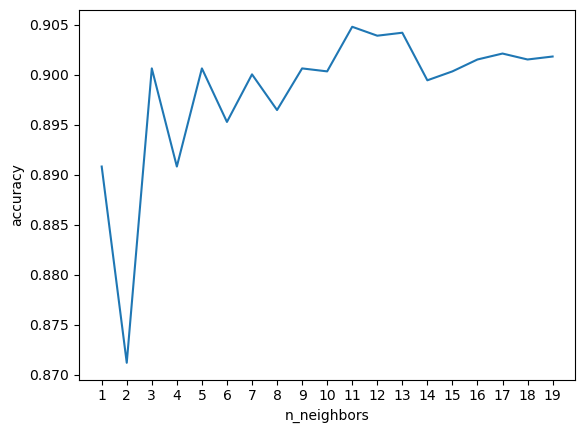

In [147]:
n_neighbors = range(1,20)
scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean")
    clf.fit(X_train_norm, y_train)
    scores.append(clf.score(X_test_norm, y_test))

plt.plot(scores)
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

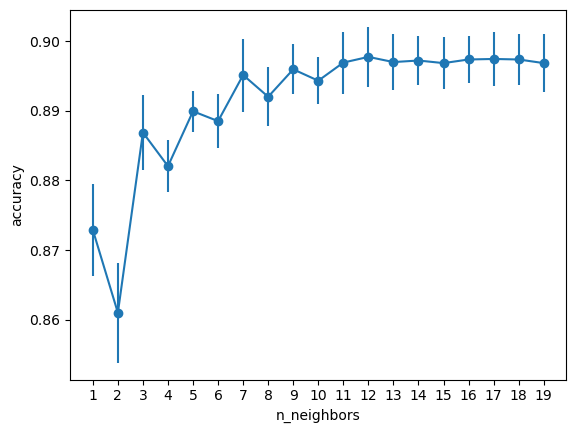

Best accuracy: 0.8977314986984009
Best k value: 12


In [148]:
from sklearn.model_selection import cross_val_score
n_neighbors = range(1,20)
avg_scores = list()
std_scores = list()
k=5
for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean")
    scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

#plt.plot(avg_scores)
plt.errorbar(range(len(n_neighbors)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()
best_accuracy = max(avg_scores)
best_k = n_neighbors[avg_scores.index(best_accuracy)]
print("Best accuracy:", best_accuracy)
print("Best k value:", best_k)


In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Supponiamo che tu abbia già diviso i tuoi dati in X_train e y_train

# Creazione di un classificatore KNN
knn = KNeighborsClassifier(n_neighbors=1)

# Eseguiamo la cross-validation 
scores = cross_val_score(knn, X_train_norm, y_train, cv=5, scoring='accuracy')

# Stampa dei punteggi ottenuti in ogni fold
print("Punteggi della cross-validation:", scores)

# Calcolo dell'accuracy media
print("Accuracy media:", scores.mean())


Punteggi della cross-validation: [0.86984009 0.87393083 0.8694682  0.86612123 0.88508739]
Accuracy media: 0.8728895500185943


In [151]:
clf = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

In [152]:
y_pred = clf.predict(X_test_norm)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [153]:
 from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1986
           1       0.88      0.89      0.88      1376

    accuracy                           0.90      3362
   macro avg       0.90      0.90      0.90      3362
weighted avg       0.90      0.90      0.90      3362



## Sbilanciamento

In [154]:
len(y_train)

13445

In [155]:
# Totale dei campioni nel dataset
totale_campioni = len(y_train)

# Calcola il numero di campioni per la classe 1 per avere il 4% del totale
campioni_classe_1 = int(totale_campioni * 0.04)

# Imposta il numero di campioni per la classe 0 al 96% del totale
campioni_classe_0 = totale_campioni - campioni_classe_1

print("Numero di campioni per la classe 1:", campioni_classe_1)
print("Numero di campioni per la classe 0:", campioni_classe_0)


Numero di campioni per la classe 1: 537
Numero di campioni per la classe 0: 12908


In [156]:
import numpy as np
from sklearn.utils import resample

# Definisci il totale dei campioni nel vettore delle etichette
totale_campioni = len(y_train)

# Calcola il numero di campioni per la classe 1 per avere il 4% del totale
campioni_classe_1 = int(totale_campioni * 0.04)

# Seleziona gli indici dei campioni della classe 1
indici_classe_1 = np.where(y_train == 1)[0]

# Sottocampionamento della classe 1
indici_classe_1_sbilanciata = resample(indici_classe_1, replace=False, n_samples=campioni_classe_1, random_state=42)

# Ora 'indici_classe_1_sbilanciata' contiene gli indici della classe 1 sottocampionata

# Seleziona gli indici della classe 0
indici_classe_0 = np.where(y_train == 0)[0]

# Combina gli indici delle due classi
indici_balanced = np.concatenate([indici_classe_0, indici_classe_1_sbilanciata])

# Ora 'indici_balanced' contiene gli indici del vettore delle etichette con la classe 1 sottocampionata al 4% del totale

# Seleziona gli elementi corrispondenti agli indici bilanciati nel vettore delle etichette
y_train_sbilanciata = y_train.iloc[indici_balanced]


In [157]:
print('Original dataset shape %s' % Counter(y_train_sbilanciata))

Original dataset shape Counter({0: 7829, 1: 537})


In [158]:
# Numero di campioni per la classe 0
num_campioni_classe_0 = 7829

# Numero di campioni per la classe 1
num_campioni_classe_1 = 537

# Totale dei campioni
totale_campioni = num_campioni_classe_0 + num_campioni_classe_1

# Proporzione per la classe 0
proporzione_classe_0 = num_campioni_classe_0 / totale_campioni

# Proporzione per la classe 1
proporzione_classe_1 = num_campioni_classe_1 / totale_campioni

print("Proporzione per la classe 0:", proporzione_classe_0)
print("Proporzione per la classe 1:", proporzione_classe_1)


Proporzione per la classe 0: 0.9358116184556539
Proporzione per la classe 1: 0.06418838154434617


In [159]:
# Seleziona gli elementi corrispondenti agli indici bilanciati nel vettore delle features
X_train_sbilanciata = X_train.iloc[indici_balanced]


In [160]:
X_train_sbilanciata.shape

(8366, 20)

## Normalization

In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
norm = StandardScaler()
norm.fit(X_train_sbilanciata)

X_train_norm = norm.transform(X_train_sbilanciata)
X_test_norm = norm.transform(X_test)

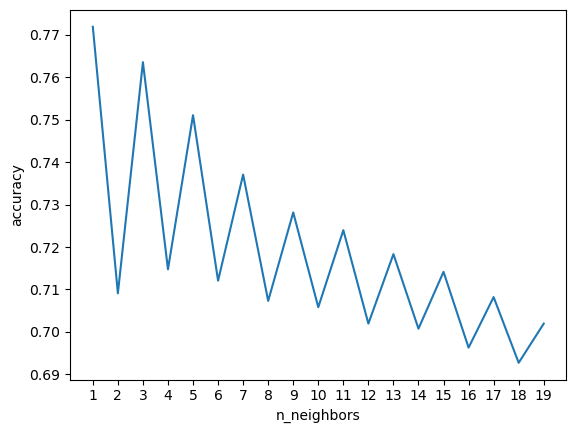

In [163]:
n_neighbors = range(1,20)
scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean")
    clf.fit(X_train_norm, y_train_sbilanciata)
    scores.append(clf.score(X_test_norm, y_test))

plt.plot(scores)
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

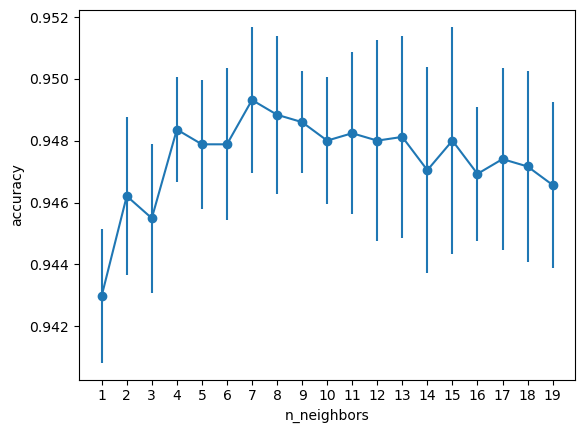

Best accuracy: 0.949318896437266
Best k value: 7


In [164]:
from sklearn.model_selection import cross_val_score
n_neighbors = range(1,20)
avg_scores = list()
std_scores = list()
k=5
for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean")
    scores = cross_val_score(clf, X_train_norm, y_train_sbilanciata, cv=k)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

#plt.plot(avg_scores)
plt.errorbar(range(len(n_neighbors)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()
best_accuracy = max(avg_scores)
best_k = n_neighbors[avg_scores.index(best_accuracy)]
print("Best accuracy:", best_accuracy)
print("Best k value:", best_k)


In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Supponiamo che tu abbia già diviso i tuoi dati in X_train e y_train

# Creazione di un classificatore KNN
knn = KNeighborsClassifier(n_neighbors=1)

# Eseguiamo la cross-validation 
scores = cross_val_score(knn, X_train_norm, y_train_sbilanciata, cv=5, scoring='accuracy')

# Stampa dei punteggi ottenuti in ogni fold
print("Punteggi della cross-validation:", scores)

# Calcolo dell'accuracy media
print("Accuracy media:", scores.mean())


Punteggi della cross-validation: [0.94563919 0.93962941 0.94441124 0.94142259 0.94381351]
Accuracy media: 0.9429831871861836


In [166]:
clf = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
clf.fit(X_train_norm, y_train_sbilanciata)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [167]:
y_pred = clf.predict(X_test_norm)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [168]:
 from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.99      0.82      1986
           1       0.97      0.37      0.54      1376

    accuracy                           0.74      3362
   macro avg       0.83      0.68      0.68      3362
weighted avg       0.81      0.74      0.70      3362



## Balancing

In [169]:
import warnings
warnings.simplefilter("ignore")

In [171]:
print('Original dataset shape %s' % Counter(y_train_sbilanciata))

Original dataset shape Counter({0: 7829, 1: 537})


## Tomek Links

In [173]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train_norm, y_train_sbilanciata)
print('Resampled dataset shape %s' % Counter(y_res)) 


Resampled dataset shape Counter({0: 7754, 1: 537})


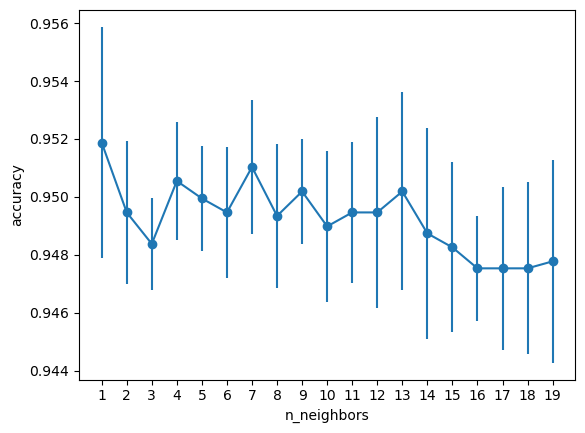

Best accuracy: 0.9518748850260051
Best k value: 1


In [174]:
from sklearn.model_selection import cross_val_score
n_neighbors = range(1,20)
avg_scores = list()
std_scores = list()
k=5
for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean")
    scores = cross_val_score(clf, X_res, y_res, cv=k)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

#plt.plot(avg_scores)
plt.errorbar(range(len(n_neighbors)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()
best_accuracy = max(avg_scores)
best_k = n_neighbors[avg_scores.index(best_accuracy)]
print("Best accuracy:", best_accuracy)
print("Best k value:", best_k)


In [175]:
clf_balanced = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
clf_balanced.fit(X_res, y_res)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [176]:
y_pred = clf_balanced.predict(X_test_norm)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [177]:
from sklearn.metrics import accuracy_score
print('Accuracy %s' % accuracy_score(y_test, y_pred))

Accuracy 0.7792980368828079


In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84      1986
           1       0.92      0.51      0.65      1376

    accuracy                           0.78      3362
   macro avg       0.83      0.74      0.75      3362
weighted avg       0.81      0.78      0.76      3362



 
# Edited Nearest Neighbours

In [180]:
from imblearn.under_sampling import EditedNearestNeighbours 

In [181]:

enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train_norm, y_train_sbilanciata)
print('Resampled dataset shape %s' % Counter(y_res)) #si partiva da 7829

Resampled dataset shape Counter({0: 7336, 1: 537})


In [182]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import numpy as np

# Definisci una lista di valori di k da testare
k_values = list(range(1, 31))  # Prova k da 1 a 30

# Inizializza una lista per memorizzare le medie delle accuratezze per ogni valore di k
mean_accuracies = []

# Itera su ogni valore di k
for k in k_values:
    # Inizializza il classificatore KNN con il valore di k corrente
    knn = KNeighborsClassifier(n_neighbors=k,  metric='euclidean')
    
    # Esegui la k-fold cross-validation con k=5
    scores = cross_val_score(knn, X_res, y_res, cv=5)
    
    # Calcola la media delle accuratezze per questo valore di k
    mean_accuracy = np.mean(scores)
    
    # Aggiungi la media delle accuratezze alla lista
    mean_accuracies.append(mean_accuracy)

# Trova il valore di k che massimizza l'accuratezza media
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)

print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)

Best k: 1
Best Accuracy: 0.9751048990540732


In [183]:
clf_balanced = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
clf_balanced.fit(X_res, y_res)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [184]:
y_pred = clf_balanced.predict(X_test_norm)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [185]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1986
           1       0.90      0.60      0.72      1376

    accuracy                           0.81      3362
   macro avg       0.84      0.78      0.79      3362
weighted avg       0.83      0.81      0.80      3362



## Oversampling

In [186]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# Adasyn

In [187]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train_norm, y_train_sbilanciata)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 7829, 1: 7788})


In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import numpy as np

# Definisci una lista di valori di k da testare
k_values = list(range(1, 31))  # Prova k da 1 a 30

# Inizializza una lista per memorizzare le medie delle accuratezze per ogni valore di k
mean_accuracies = []

# Itera su ogni valore di k
for k in k_values:
    # Inizializza il classificatore KNN con il valore di k corrente
    knn = KNeighborsClassifier(n_neighbors=k,  metric='euclidean')
    
    # Esegui la k-fold cross-validation con k=5
    scores = cross_val_score(knn, X_res, y_res, cv=5)
    
    # Calcola la media delle accuratezze per questo valore di k
    mean_accuracy = np.mean(scores)
    
    # Aggiungi la media delle accuratezze alla lista
    mean_accuracies.append(mean_accuracy)

# Trova il valore di k che massimizza l'accuratezza media
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)

print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)

Best k: 1
Best Accuracy: 0.9669595455303943


In [189]:
clf_balanced = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
clf_balanced.fit(X_res, y_res)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [190]:
clf_balanced = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
clf_balanced.fit(X_res, y_res)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1986
           1       0.90      0.60      0.72      1376

    accuracy                           0.81      3362
   macro avg       0.84      0.78      0.79      3362
weighted avg       0.83      0.81      0.80      3362

